# Исследование закономерностей, определяющих успешность игр

Исследование состоит из следющих частей:
* [загрузка и изучение данных](#section1):
    * [предобработка данных](#section2);
    * [изучение данных](#section3);
    * [вывод по разделу](#section4);
* [предобработка данных](#section5):
    * [корректировка названий полей](#section6);
    * [выявление дубликатов](#section7);
    * [заполнение пропусков](#section8);
    * [изменение типов данных](#section9);
    * [выявление аномалий в полях с категориальными переменными](#section10);
    * [добавление поля с объемом продаж по всем регионам](#section11);
    * [вывод по разделу](#section12);
* [исследовательский анализ данных](#section13):
    * [анализ количества выпущенных игр в зависимости от года](#section14);
    * [анализ продаж по платформам](#section15);
    * [выявление потенциально прибыльных платформ](#section16);
    * [анализ распределений продаж по платформам](#section17);
    * [анализ влияний оценок пользователей и критиков на объемы продаж](#section18);
    * [анализ распределений игр по жанрам](#section19);
    * [вывод по разделу](#section20);
* [составление портрета пользователя в зависимости от региона](#section21):
    * [определение популярных платформ в зависимости от региона](#section22);
    * [определение популярных жанров в зависимости от региона](#section23);
    * [оценка влияния рейтинга ESRB на объемы продаж по регионам](#section24);
    * [вывод по разделу](#section25);
* [проверка гипотез](#section26):
    * [различие средних пользовательских рейтингов платформ Xbox One и PC](#section27);
    * [различие средних пользовательских рейтингов игр жанров Action и Sports](#section28);
    * [вывод по разделу](#section29);
* [вывод по исследованию](#section30)

<a id='section1'></a>
## Загрузка и изучение данных

<a id='section2'></a>
### Загрузка данных

Загрузим необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta
from scipy import stats as st

Загрузим данные и сохраним их в переменную `games`:

In [2]:
games = pd.read_csv('games.csv')

<a id='section3'></a>
### Изучение данных

Изучим данные в датафрейме. Выведем на экран первые 10 записей датафрейма `games` и информацию о датафрейме:

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датафрейме `games` 16715 записей и 11 полей, из которых 6 полей с данными типа `float64`, и 5 полей с данными типа `object`.

Датафрейм содержит следующие поля:
* `Name` - название игры;
* `Platform` - платформа;
* `Year_of_Release` - год выпуска;
* `Genre` - жанр игры;
* `NA_sales` - объем продаж в Северной Америке в миллионах копий;
* `EU_sales` - объем продаж в Европе в миллионах копий;
* `JP_sales` - объем продаж в Японии в миллионах копий;
* `Other_sales` - объем продаж в других странах в миллионах копий;
* `Critic_Score` - оценка критиков в диапазоне от 0 до 100;
* `User_Score` - оценка пользователей в диапазоне от 0 до 10;
* `Rating` - возрастной рейтинг от ассоциации ESRB.

Датафрейм `games` содержит информацию об играх. Разница в количестве строк свидетельствует о пропущенных значениях в полях `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, и `Rating`. Названия полей следует изменить. Тип `object` в поле `User_Score` свидетельствует о наличии в этом поле нечисловых значений - это необходимо исправить. Также целесообразно изменить типы данных полей `Year_of_Release`, `Critic_Score` и `User_Score` - с целочисленный и вещественный. Кроме того, необходимо убедиться, что в датафрейме отсутствуют явные и неявные дубликаты и аномалии.

<a id='section4'></a>
### Вывод

Данные для исследования представлены в одном датафрейме. Для исследования необходимо подготовить данные к анализу - проанализировать пропущенные значения и, при необходимости, заполнить их, изменить типы данных и скорректировать заголовки полей. Кроме того, необходимо убедиться в отсутствии дубликатов и аномалий в данных  и рассчитать суммарные продажи во всех регионах.

<a id='section5'></a>
## Предобработка данных

<a id='section6'></a>
### Корректировка названий полей

Скорректируем заголовки полей датафрейма `games` - приведем к нижнему регистру:

In [5]:
games = games.rename(
    str.lower,
    axis='columns'
)

<a id='section7'></a>
### Выявление дубликатов

Проверим датафрейм `games` на наличие явных дубликатов:

In [6]:
games.duplicated().sum()

0

Явные дубликаты в датафрейме `games` отсутствуют. В датафрейме могут присутствовать неявные дубликаты - сочетания одинаковых значений полей `name`, `platform` и `year_of_release`, то есть игры с одинаковыми названиями, выпущенные для одной и той же платформы в один и тот же год:

In [7]:
games[['name', 'platform', 'year_of_release']].duplicated().sum()

2

Удалим дубликаты:

In [8]:
games = games.drop_duplicates(subset=['name', 'platform'])

<a id='section8'></a>
### Заполнение пропусков

Определим количество пропущенных значений в полях датафрейма `games`:

In [9]:
games.isna().sum()

name                  1
platform              0
year_of_release     268
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Пропуски присутствуют в полях `name`, `year_of_release`, `genre`, `critic_score`, `user_score` и `rating`. Изучим запись датафрейма с пропуском в поле `name`:

In [10]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Очевидно, что записи датафрейма с пропущенными значениями в полях `name` и `genre` не несут никакой смысловой нагрузки для исследования, и мы можем позволить себе удалить эти записи из датафрейма:

In [11]:
games = games.dropna(subset=['name'])

Пропуски в поле `year_of_release` обусловлены тем, что у некоторых игр не указан год релиза. Вследствие отсутсвия необходимой информации заполнить пропуски в этом поле достоверными данными невозможно. Объем пропусков незначителен - 1,6%, следовательно, можем позволить себе удалить эти записи:

In [12]:
games = games.dropna(subset=['year_of_release'])

В полях `critic_score`, `user_score` и `rating` отсутствуют соответственно 51%, 40% и 40% значений. Предполагаемая причина пропусков банальна - пользователи и (или) критики не дали оценку играм, а ESRB не дала рейтинг. Это могло произойти потому, что некоторые игры не привлекли внимания широкой аудитории, присутствовали только на локальных рынках и по другим подобным причинам. Кроме того, ESRB определяет рейтинги для игр только в Северной Америке. Поскольку оценки у таких игр отсутствуют, логично заполнить пропуски в полях `critic_score` и `user_score` значением `0`, а пропуски в поле `rating` заполнить явными обозначениями. При этом мы не можем заменить пропущенные значения в этих полях средними и характерными, поскольку это исказит данные и они не будут соответствовать действительности. Кроме того, в поле `user_score` пристутсвуют значения `tbd`, что значит To Be Determined. Это подразумевает, что на момент формирования датафрейма рейтинг некоторых игр ёще не был определен пользователями:

In [13]:
games['user_score'].value_counts(dropna=False)

NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.9       2
1.5       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

Логично и такие значения заменить на `0`. Заполним пропуски в полях `critic_score` и `user_score` и значения `tbd` в поле `user_score` значениями `0`, а пропуски в поле `rating` - явными обозначениями `n/d`:

In [14]:
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)
games['rating'] = games['rating'].fillna('n/d')
games['user_score'] = games['user_score'].replace({'tbd' : 0})

<a id='section9'></a>
### Изменение типов данных

Изменим тип данных в полях `year_of_release` и `critic_score` с вещественного на целочисленный:

In [15]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['critic_score'] = games['critic_score'].astype('int')
games['user_score'] = games['user_score'].astype('float64')

<a id='section10'></a>
### Выявление аномалий в полях с категориальными переменными

Проверим поля с категориальными переменными на наличие ананомалий. Начнем с поля `platform`:

In [16]:
games['platform'].value_counts()

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1231
PSP     1193
PS      1190
PC       956
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Аномалии в поле `platform` отсутствуют. Проверим поле `genre`:

In [17]:
games['genre'].value_counts()

Action          3307
Sports          2305
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1224
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Каких-либо аномалий в поле `genre` нет. Проверим поле `raiting`:

In [18]:
games['rating'].value_counts()

n/d     6676
E       3920
T       2903
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Аномалий в поле `raiting` нет.

<a id='section11'></a>
### Добавление поля с объемом продаж по всем регионам

Добавим в датафрейм `games` поле с совокупным объемом продаж по всем регионам:

In [19]:
games['all_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis='columns')

Выведем первые 10 строк обновленного датафрейма на экран:

In [20]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,n/d,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,n/d,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,n/d,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,n/d,28.31


<a id='section12'></a>
### Вывод

В процессе предобработки удалили из датафрейма дубликаты и записи с аномалиями, скорректировали наименования полей датафрейма, изучили пропуски и заполнили их там, где это необходимо. Можем переходить к анализу данных.

<a id='section13'></a>
## Исследовательский анализ данных

<a id='section14'></a>
### Анализ количества выпущенных игр в зависимости от года

Изучим количество выпущенных игр в зависимости от года выпуска:

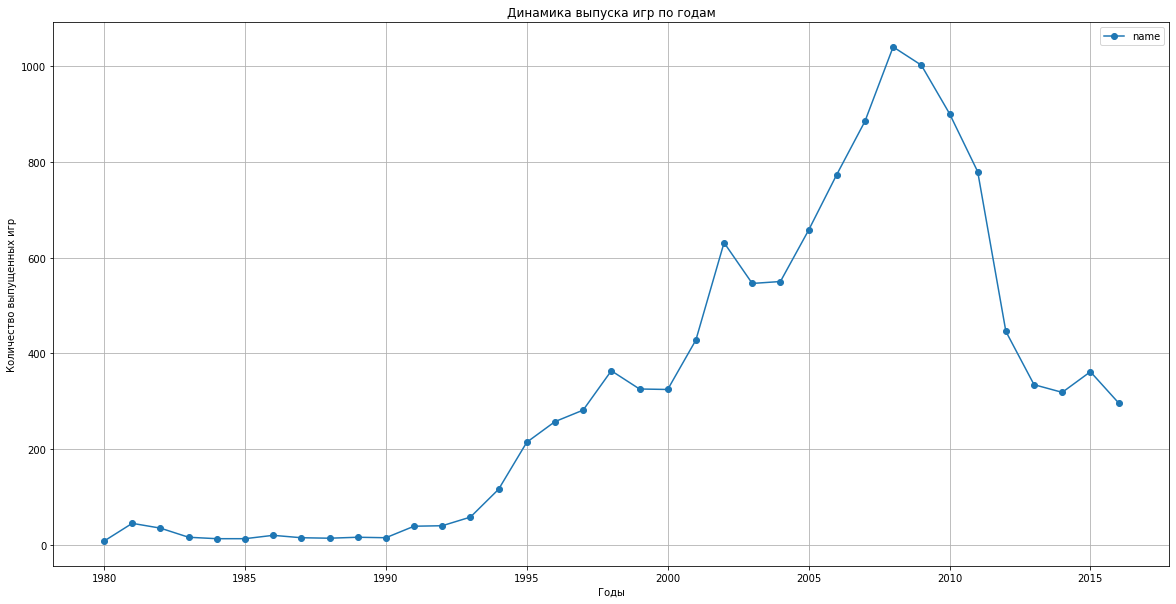

In [21]:
games.groupby(
    ['year_of_release']
).agg(
    {'name' : 'nunique'}
).plot(style='o-', grid=True, figsize=(20, 10))
plt.xlabel('Годы')
plt.ylabel('Количество выпущенных игр')
plt.title('Динамика выпуска игр по годам')
plt.show()

<a id='section15'></a>
### Анализ продаж по платформам

Проанализируем объмы продаж игр по платформам. Выберем платформы с наибольшими суммарными продажами:

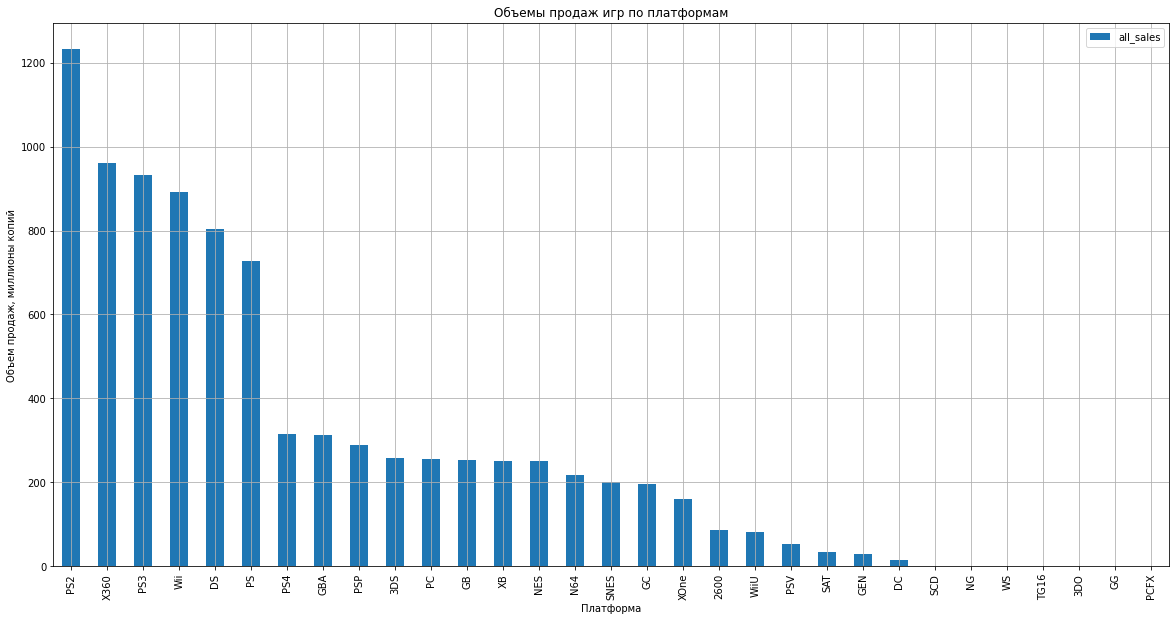

In [22]:
games.groupby(
    'platform'
).agg(
    {'all_sales' : 'sum'}
).sort_values(
    by='all_sales', ascending=False
).plot(
    kind='bar', grid=True, figsize=(20, 10)
)
plt.xlabel('Платформа')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Объемы продаж игр по платформам')
plt.show()

Для последующего анализа выберем 6 наиболее крупных по объемам продаж платформ: SP2, X360, PS3, Wii, DS, PS. Построим распределение продаж по каждой выбранной платформе по годам:

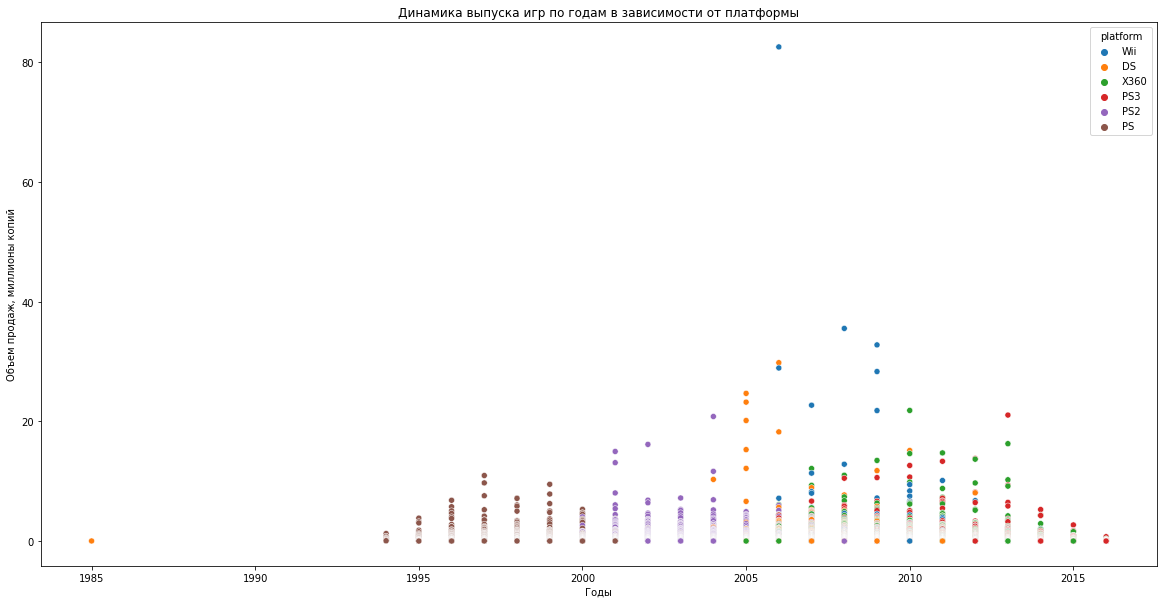

In [23]:
platforms = games.groupby(
    'platform'
).agg(
    {'all_sales' : 'sum'}
).sort_values(
    by='all_sales', ascending=False
)

platforms = platforms.index[:6].tolist()

plt.figure(figsize=(20,10))
sns.scatterplot(
    data=games.query('platform in @platforms'),
    x='year_of_release',
    y='all_sales',
    hue='platform'
)
plt.xlabel('Годы')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Динамика выпуска игр по годам в зависимости от платформы')
plt.show()

На диагрмме присутствуют выдающиеся значения. Построим диаграмму без них:

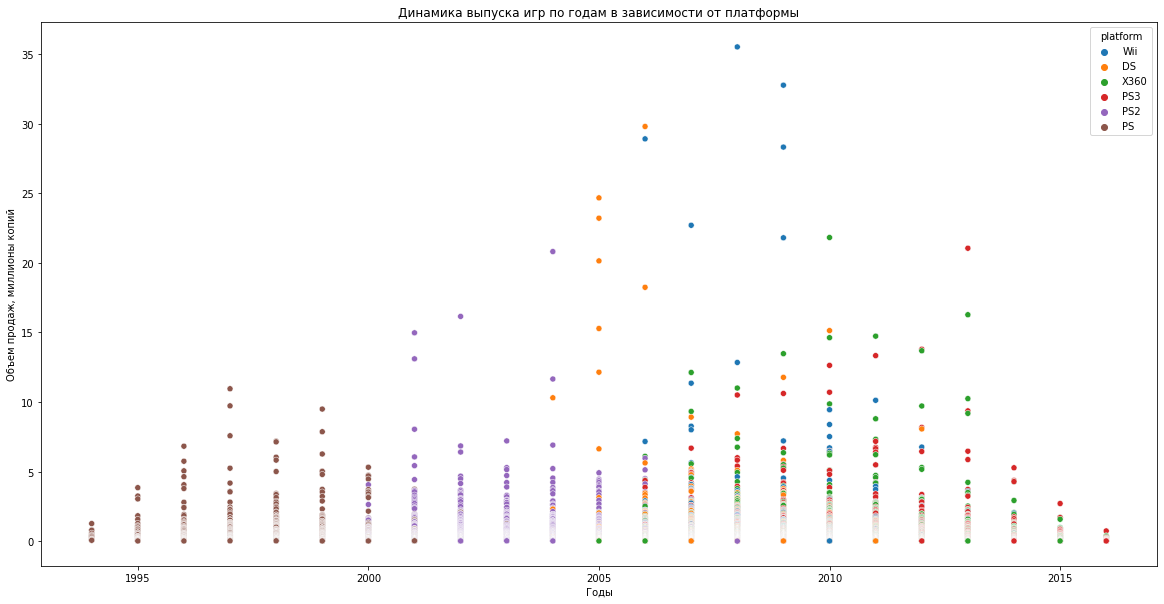

In [24]:
plt.figure(figsize=(20,10))
sns.scatterplot(
    data=games.query('year_of_release >= 1994 and platform in @platforms and all_sales < 80'),
    x='year_of_release',
    y='all_sales',
    hue='platform'
)
plt.xlabel('Годы')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Динамика выпуска игр по годам в зависимости от платформы')
plt.show()

Для наглядности отобразим данные в сводной таблице:

In [25]:
games.query(
    'year_of_release >= 1994 and platform in @platforms and all_sales < 80'
).pivot_table(
    index='platform',
    columns='year_of_release',
    values='all_sales',
    aggfunc='sum'
).T

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN


Характерный период, за который исчезают старые и появляются новые платформы, примем равным 3 годам, так как это достаточная продолжительность для утраты актуальности и приобретения устойчивой популярности у пользователей. При этом актуальным периодом будем считать период с 2014 по 2016 год.

<a id='section16'></a>
### Выявление потенциально прибыльных платформ

Для дальнейшего анализа будем использовать датафрейм `actual_period_games` с данными об играх, которые были выпущены в 2011 году и новее:

In [26]:
actual_period_games = games.query('year_of_release >= 2014')
actual_period_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,n/d,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,n/d,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,n/d,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,0,0.0,n/d,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,n/d,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


Для выявления потенциально прибыльных платформ построим график динамики объемов продаж по платформам:

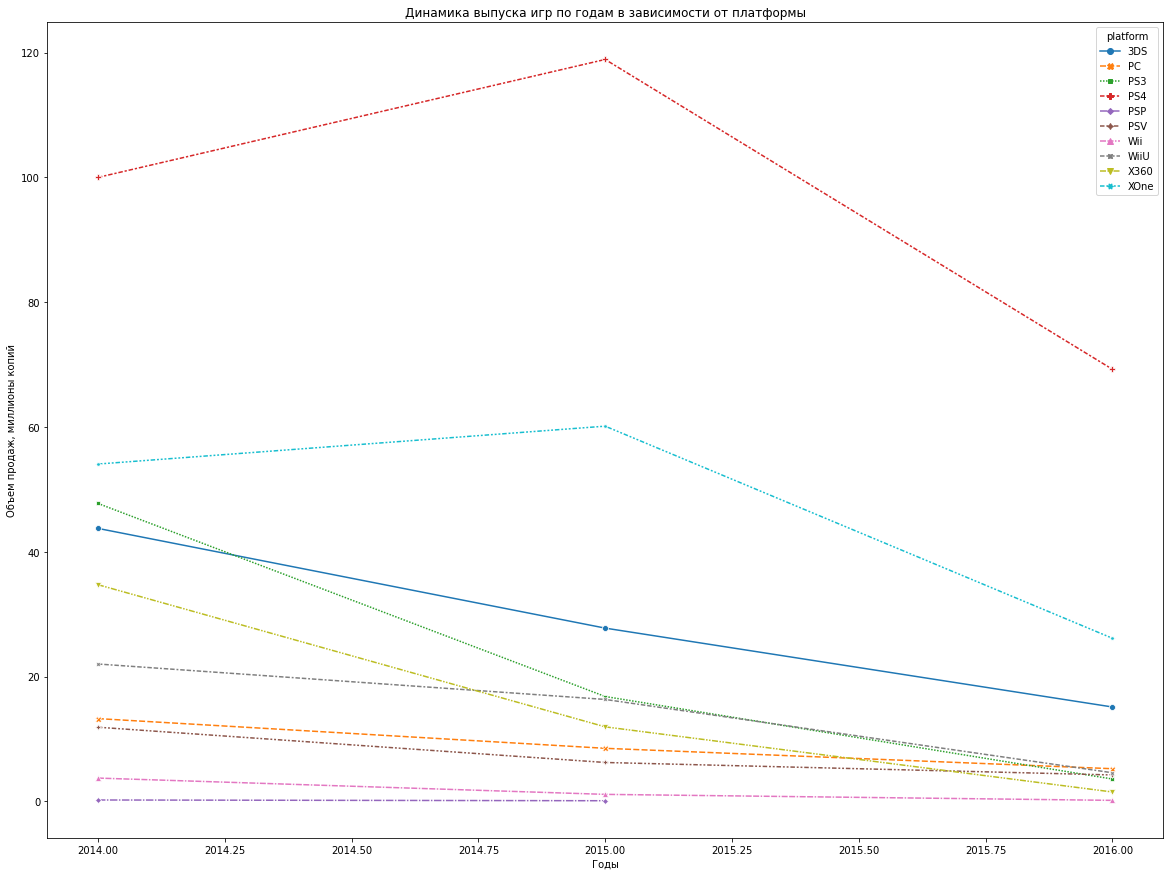

In [27]:
plt.figure(figsize=(20,15))
sns.lineplot(
    data=actual_period_games.groupby(['platform','year_of_release']).agg({'all_sales':'sum'}),
    x='year_of_release',
    y='all_sales',
    hue='platform',
    style='platform',
    estimator=None,
    markers=True
)
plt.xlabel('Годы')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Динамика выпуска игр по годам в зависимости от платформы')
plt.show()

Для наглядности выведем данные в сводной таблице:

In [28]:
actual_period_games.pivot_table(
    index='platform',
    columns='year_of_release',
    values='all_sales',
    aggfunc='sum'
)

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


Устойчивый рост на 2015 год (данные за 2016 год, очевидно, не полные) показывают платформы PS4 и XOne. Их можно считать потенциально прибыльными. Объемы продаж игр для прочих платформ, например, 3DS, WiiU, PSV устойчиво сокращаются.

<a id='section17'></a>
### Анализ распределений продаж по платформам

Построим диаграммы размаха по объемам продаж игр в зависимости от платформы:

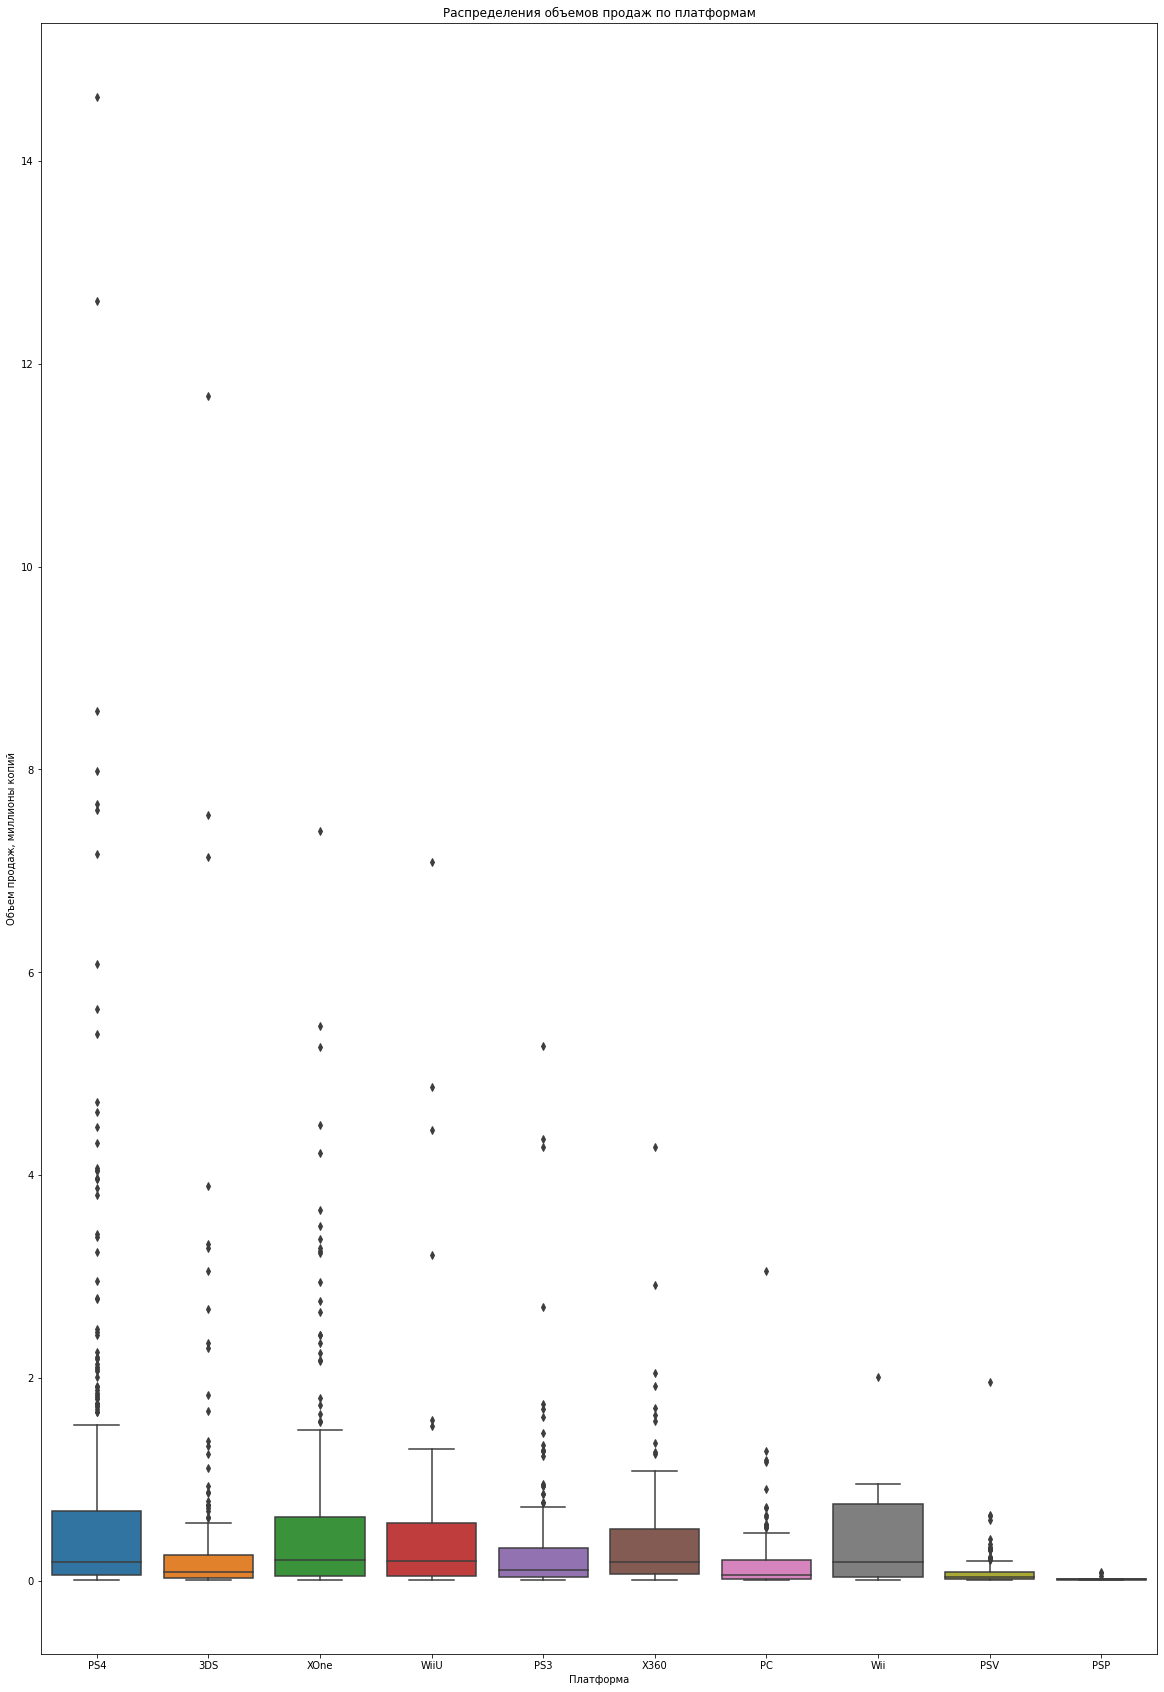

In [29]:
plt.figure(figsize=(20,30))
sns.boxplot(
    data=actual_period_games,
    x='platform',
    y='all_sales'
)
plt.xlabel('Платформа')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Распределения объемов продаж по платформам')
plt.show()

Очевидно большое количество выбросов по каждой платформе, кроме PSP и PSV. Для более наглядного отображения ограничим масштаб по оси y:

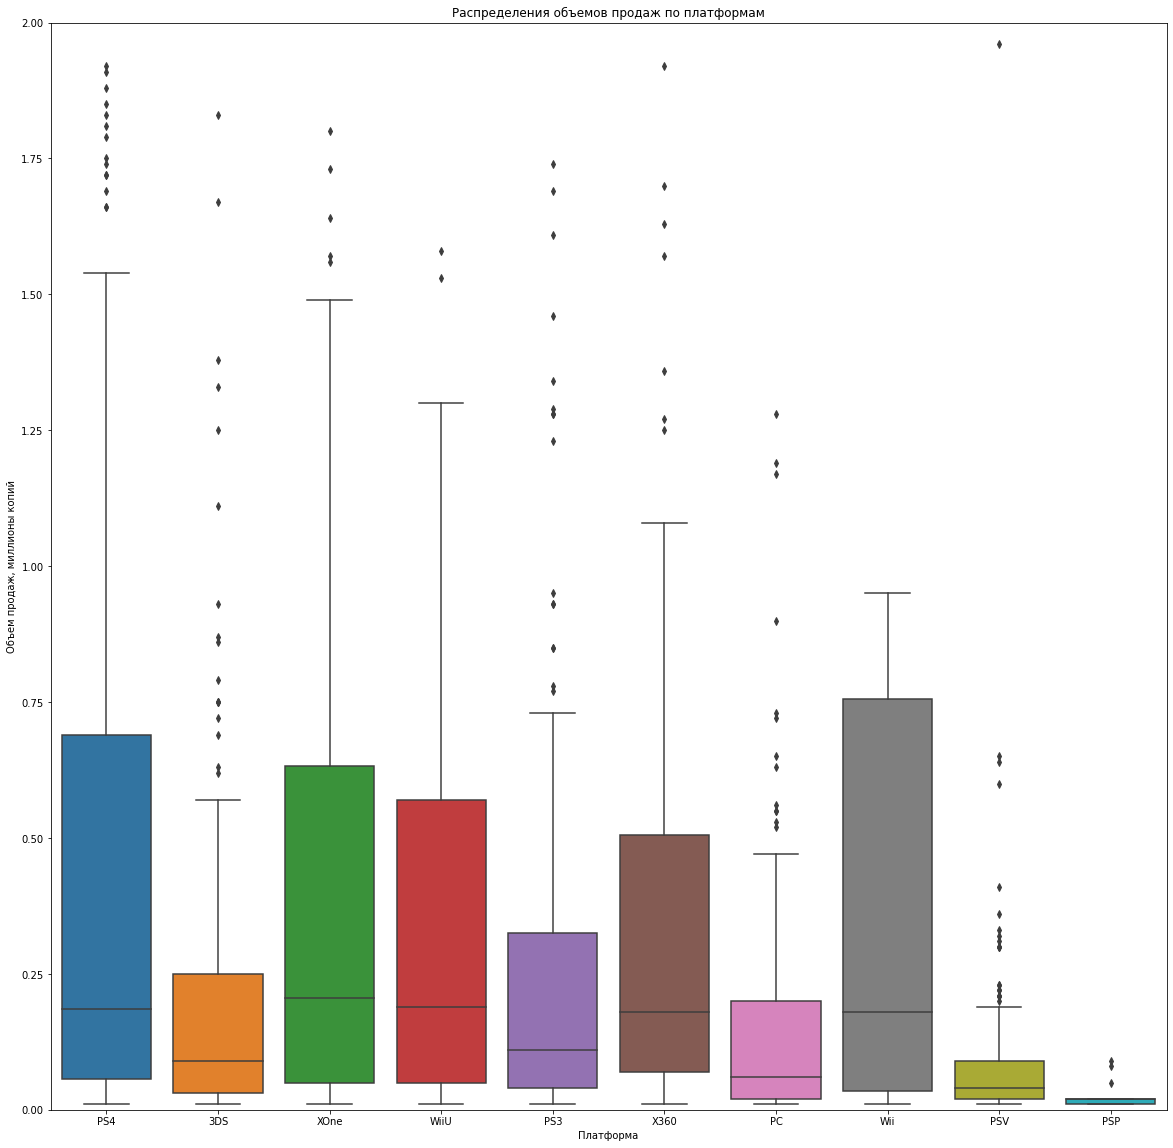

In [30]:
plt.figure(figsize=(20,20))
sns.boxplot(
    data=actual_period_games,
    x='platform',
    y='all_sales'
)
plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Распределения объемов продаж по платформам')
plt.show()

Нижняя граница нормального размаха для каждой платформы - чуть больше 0. Максимальная граница значительно варьируется в зависимости от платформы: от 1,55 миллиона у PS4 до примерно 0,2 миллиона у PSV. Медиана варьируется не так сильно - от примерно 0,225 у XOne до 0,075 у PSV.

<a id='section18'></a>
### Анализ влияний оценок пользователей и критиков на объемы продаж

Определим самую популярную платформу за анализируемый период по объему продаж:

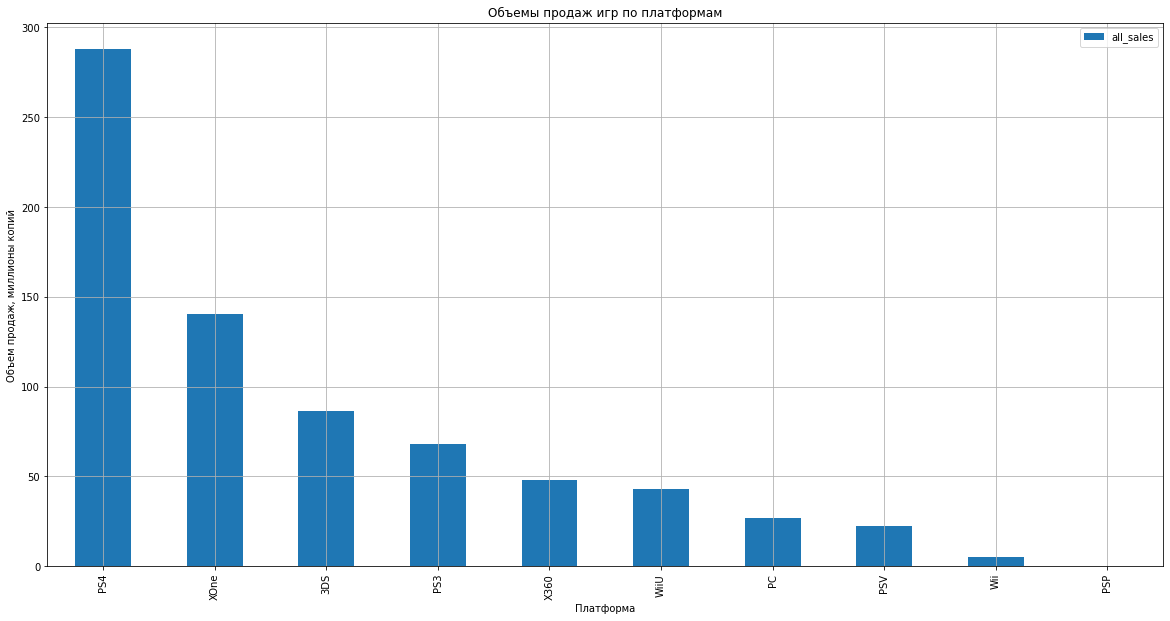

In [31]:
actual_period_games.groupby(
    'platform'
).agg(
    {'all_sales' : 'sum'}
).sort_values(
    by='all_sales', ascending=False
).plot(
    kind='bar', grid=True, figsize=(20, 10)
)
plt.xlabel('Платформа')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Объемы продаж игр по платформам')
plt.show()

По графику очевидно, что самая популярная платформа - PS4. Проанализируем влияние оценок пользователей и критиков на продажи игр для этой платформы. Построим диаграмму рассеяния и коэффициент корреляции Пирсона для значений оценок критиков и объемов продаж игр (нулевые оценки фильтруем, так как они не соответствуют действительности):

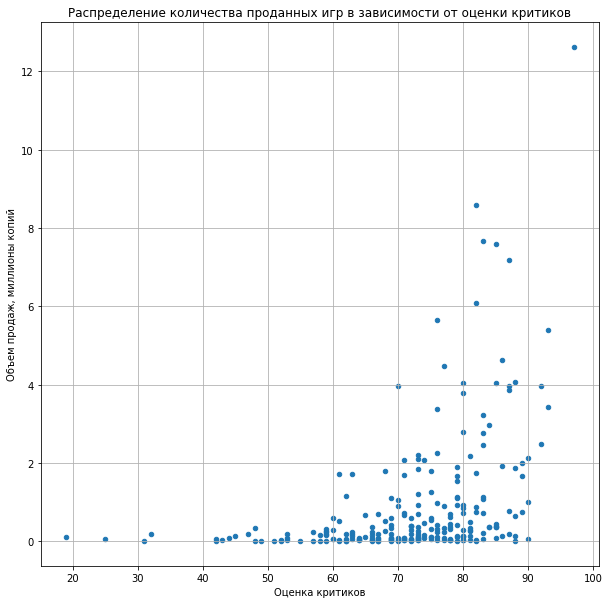

In [32]:
actual_period_games.query(
    'platform == "PS4" and critic_score != 0'
).plot(
    x='critic_score',
    y='all_sales',
    kind='scatter',
    grid='true',
    figsize=(10, 10)
)
plt.xlabel('Оценка критиков')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Распределение количества проданных игр в зависимости от оценки критиков')
plt.show()

In [33]:
actual_period_games.query(
    'platform == "PS4" and critic_score != 0'
)['all_sales'].corr(
    actual_period_games.query(
        'platform == "PS4" and critic_score != 0'
    )['critic_score']
)

0.40266141068104083

По диаграмме очевидно, что чем выше рейтинг, тем больше объем продаж. Значение коэффициент корреляции Пирсона также свидетельствует о наличии зависимости. Построим диаграмму рассеяния и коэффициент корреляции Пирсона для значений оценок пользователей и объемов продаж игр (нулевые оценки пользователей учитывать не будем):

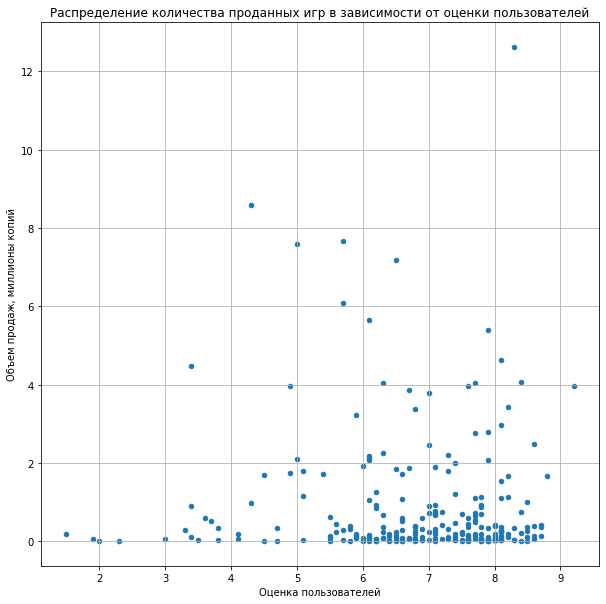

In [34]:
actual_period_games.query(
    'platform == "PS4" and user_score != 0'
).plot(
    x='user_score',
    y='all_sales',
    kind='scatter',
    grid='true',
    figsize=(10, 10)
)
plt.xlabel('Оценка пользователей')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Распределение количества проданных игр в зависимости от оценки пользователей')
plt.show()

In [35]:
actual_period_games.query(
    'platform == "PS4" and user_score != 0'
)['all_sales'].corr(
    actual_period_games.query(
        'platform == "PS4" and user_score != 0'
    )['user_score']
)

-0.040131589472697356

По диаграмме однозначного вывода сделать нельзя, а значение коэффициента Корреляции Пирсона свидтелельствует об отсутсвии корреляции между величинами. Следовательно, зависимость между оценками пользователей и объемом продаж отсутствует. Проверим выводы, полученные для PS4, на двух других платформах со значительными объемами продаж - XOne и PS3. Построим аналогичные графики и посчитаем коэффициент корреляции Пирсона для значений оценок и объемов продаж игр для XOne:

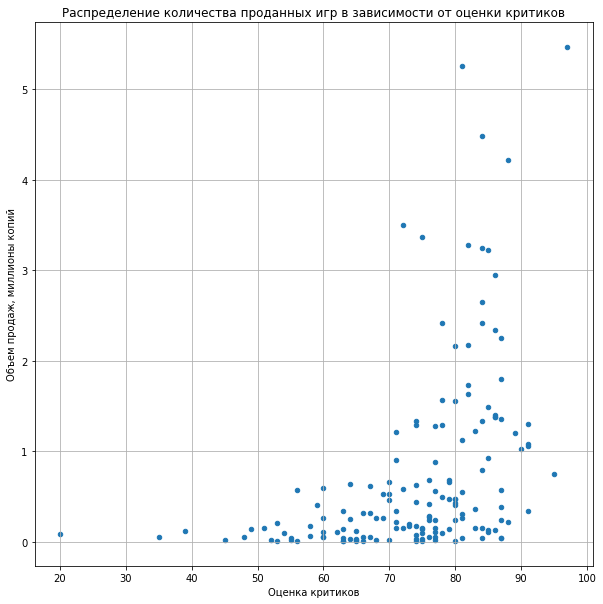

In [36]:
actual_period_games.query(
    'platform == "XOne" and critic_score != 0'
).plot(
    x='critic_score',
    y='all_sales',
    kind='scatter',
    grid='true',
    figsize=(10, 10)
)
plt.xlabel('Оценка критиков')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Распределение количества проданных игр в зависимости от оценки критиков')
plt.show()

In [37]:
# расчет коэффиента корреляции для оценок критиков
actual_period_games.query(
    'platform == "XOne" and critic_score != 0'
)['all_sales'].corr(
    actual_period_games.query(
        'platform == "XOne" and critic_score != 0'
    )['critic_score']
)

0.42867694370333226

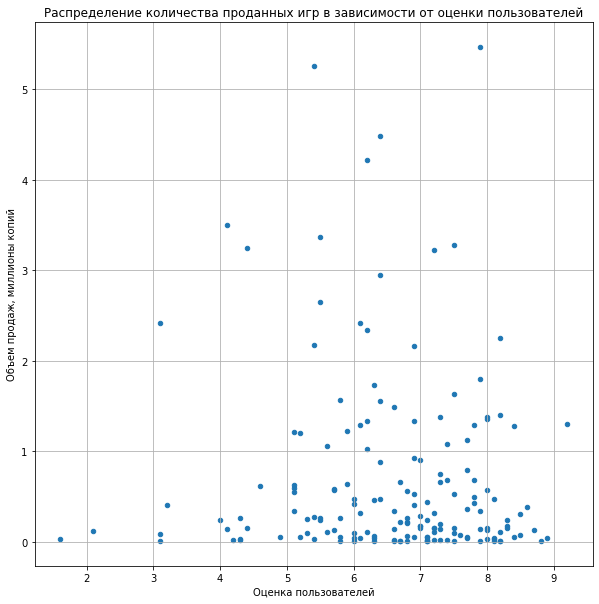

In [38]:
actual_period_games.query(
    'platform == "XOne" and user_score != 0'
).plot(
    x='user_score',
    y='all_sales',
    kind='scatter',
    grid='true',
    figsize=(10, 10)
)
plt.xlabel('Оценка пользователей')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Распределение количества проданных игр в зависимости от оценки пользователей')
plt.show()

In [39]:
# расчет коэффиента корреляции для оценок пользователей
actual_period_games.query(
    'platform == "XOne" and user_score != 0'
)['all_sales'].corr(
    actual_period_games.query(
        'platform == "XOne" and user_score != 0'
    )['user_score']
)

-0.0703839280647581

Диаграммы распределения количества проданных игр в зависимости от оценок по платформе XOne соответствуют аналогичным диаграммам по PS4, а соответствующие значения корреляции близки между собой. Построим аналогичные графики и посчитаем коэффициент корреляции Пирсона для значений оценок и объемов продаж игр для PS3:

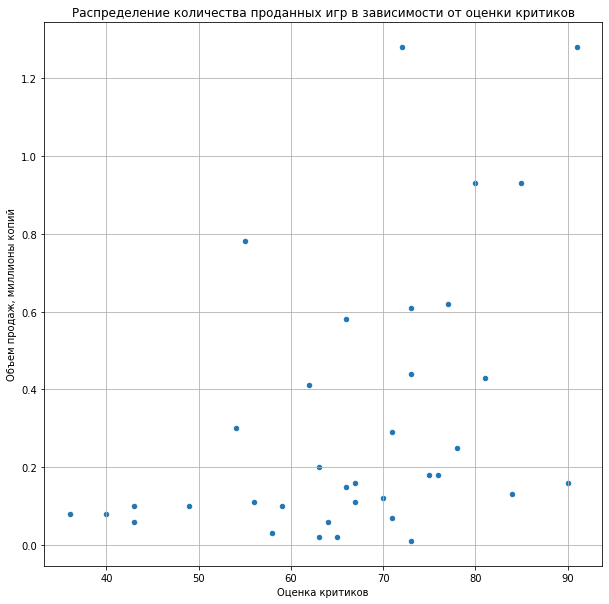

In [40]:
actual_period_games.query(
    'platform == "PS3" and critic_score != 0'
).plot(
    x='critic_score',
    y='all_sales',
    kind='scatter',
    grid='true',
    figsize=(10, 10)
)
plt.xlabel('Оценка критиков')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Распределение количества проданных игр в зависимости от оценки критиков')
plt.show()

In [41]:
# расчет коэффиента корреляции для оценок критиков
actual_period_games.query(
    'platform == "PS3" and critic_score != 0'
)['all_sales'].corr(
    actual_period_games.query(
        'platform == "PS3" and critic_score != 0'
    )['critic_score']
)

0.44657460493190704

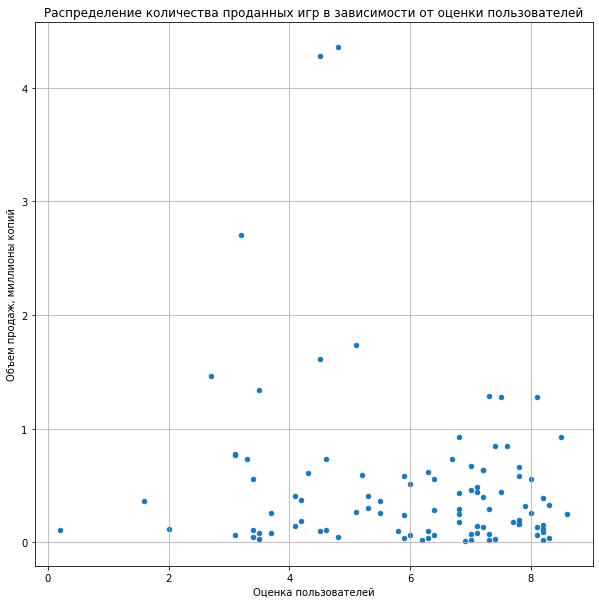

In [42]:
actual_period_games.query(
    'platform == "PS3" and user_score != 0'
).plot(
    x='user_score',
    y='all_sales',
    kind='scatter',
    grid='true',
    figsize=(10, 10)
)
plt.xlabel('Оценка пользователей')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Распределение количества проданных игр в зависимости от оценки пользователей')
plt.show()

In [43]:
# расчет коэффиента корреляции для оценок пользователей
actual_period_games.query(
    'platform == "PS3" and user_score != 0'
)['all_sales'].corr(
    actual_period_games.query(
        'platform == "PS3" and user_score != 0'
    )['user_score']
)

-0.16676141347662116

C объемами продаж игр для PS3 и их оценками ситуация аналогичная. Таким образом можно сделать вывод, что между объемами продаж игр для трех платформ за анализируемый период и оценками критиков корреляция есть, а между объемами продаж и оценками пользователей - корреляции нет.

<a id='section19'></a>
### Анализ распределения игр по жанрам

Оценим количество выпущенных игр по жанрам за анализируемый период:

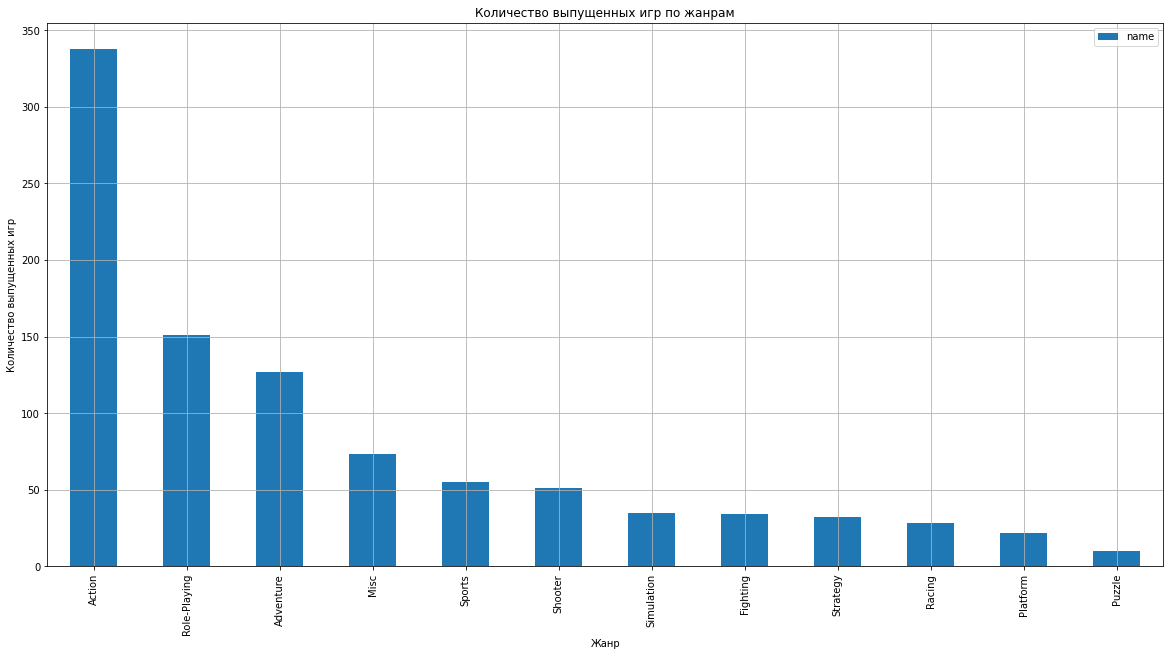

In [44]:
actual_period_games.groupby(
    'genre'
).agg(
    {'name' : 'nunique'}
).sort_values(
    by='name', ascending=False
).plot(
    kind='bar', grid=True, figsize=(20, 10)
)
plt.xlabel('Жанр')
plt.ylabel('Количество выпущенных игр')
plt.title('Количество выпущенных игр по жанрам')
plt.show()

По количеству выпущенных игр с большим отрывом лидирует жанр Action. Другие значимые жанры - Role-Playing, Adventure, Sports, Music и Shooter. Построим аналогичный график по медианным значениям объема продаж в зависимости от жанра за анализируемый период:

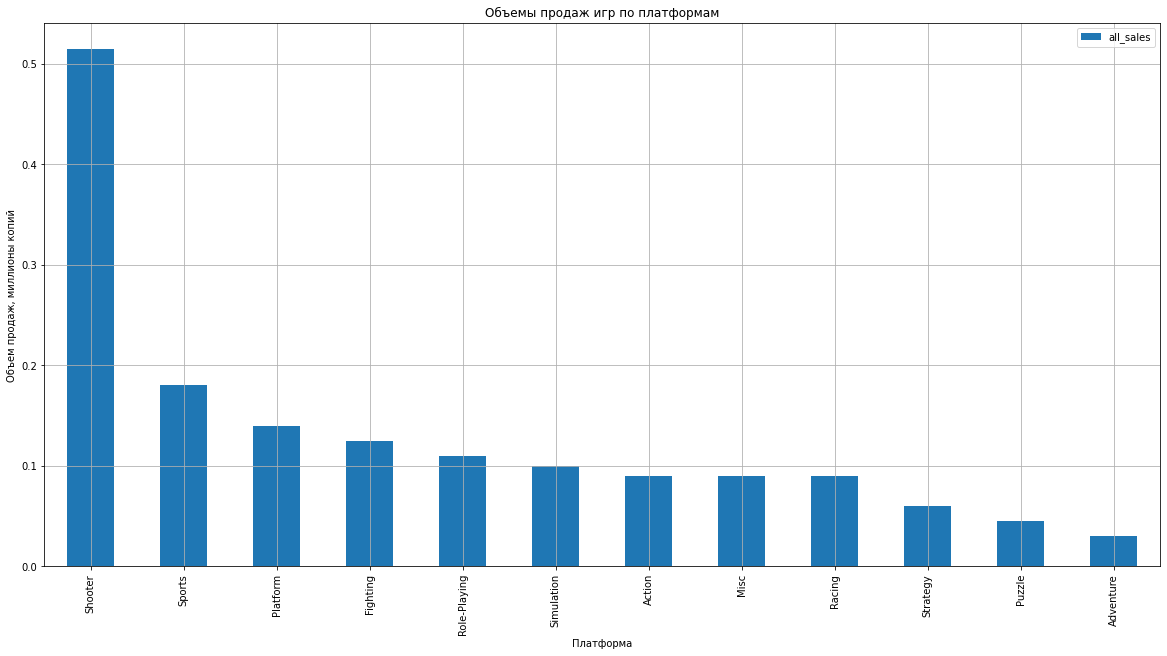

In [45]:
actual_period_games.groupby(
    'genre'
).agg(
    {'all_sales' : 'median'}
).sort_values(
    by='all_sales', ascending=False
).plot(
    kind='bar', grid=True, figsize=(20, 10)
)
plt.xlabel('Платформа')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Объемы продаж игр по платформам')
plt.show()

По медианным значениям продаж лидируют со значительным отрывом лидирую игры жанра Shooter. При этом игры жанров Actioin и Adenture, которых выпущено много, не пользуются популярностью. Построим график по медианным значениям продаж в зависимости от жанра за анализируемый период:

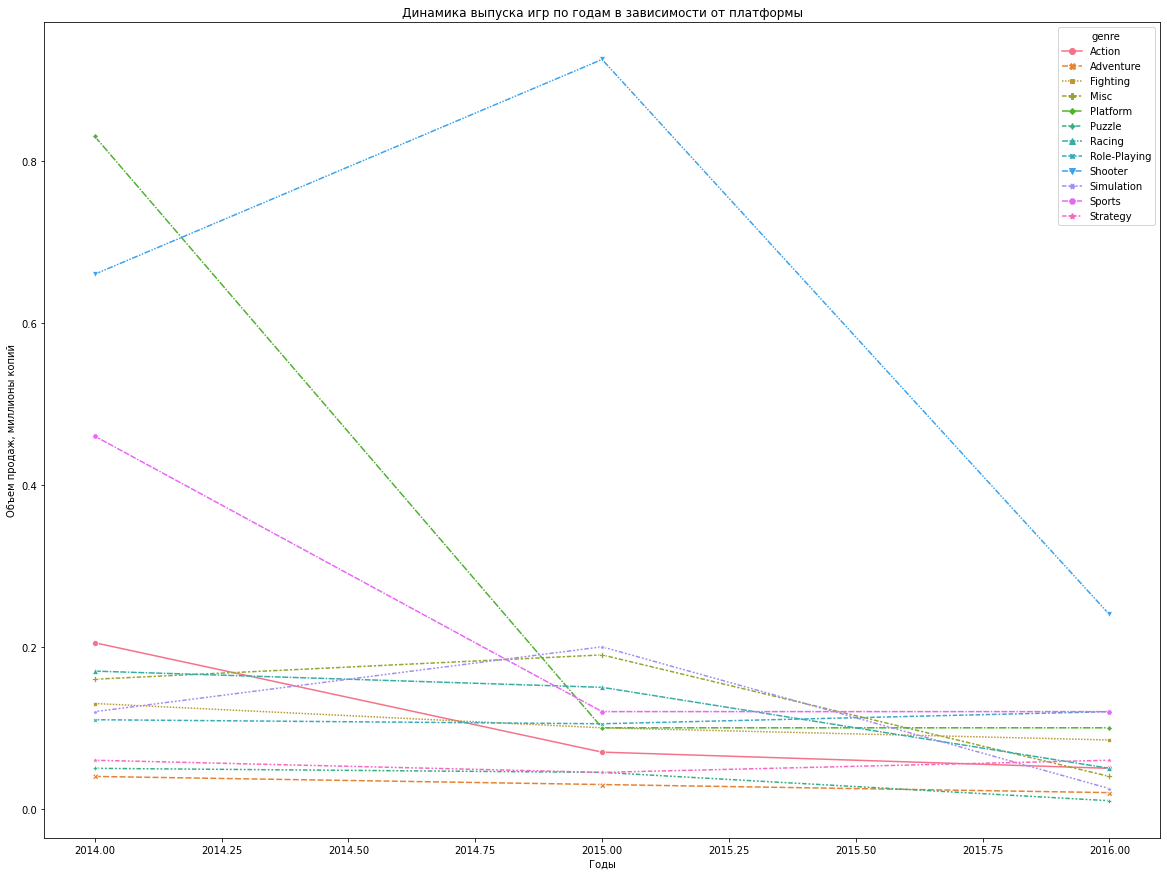

In [46]:
plt.figure(figsize=(20,15))
sns.lineplot(
    data=actual_period_games.groupby(['genre','year_of_release']).agg({'all_sales':'median'}),
    x='year_of_release',
    y='all_sales',
    hue='genre',
    style='genre',
    estimator=None,
    markers=True
)
plt.xlabel('Годы')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Динамика выпуска игр по годам в зависимости от платформы')
plt.show()

Позитивную динамику демонструют только игры жанра Shooter. Объемы продаж игр других жанров снижаются. Можно сделать вывод, что Shooter - наиболее прибыльный жанр.

<a id='section20'></a>
### Вывод

В результате исследовательского анализа данных можем сделать следующие выводы:
* Данные до 2001 года совершенно бесполезны для анализа, поскольку в этот период рынок видеоигр еще только формировался;
* характерным периодом, за который исчезают старые и появляются старые платформы, можно считать 3 года, а актуальным - последние 3 года в данных, то есть период с 2014 по 2016 год;
* устойчивый рост количества проданных игр показывают платформы PS4 и XOne - их можно считать перспективными;
* как минимум объемы продаж игр трех популярных платформ за анализируемый период коррелируют с оценками критиков, а с оценками пользователей - не коррелируют; 
* по медианным значениям продаж лидирует жанр Shooter, при этом количество выпущенных игр жанра Shooter в 4 раза меньше, например, количества выпущенных игр жанра Action.

<a id='section21'></a>
## Составление портрета пользователя в зависимости от региона

<a id='section22'></a>
### Определение популярных платформ в зависимости от региона

Определим популярные платформы по объемам продаж игр для них в Северной Америке, Японии и Европе. Начнем с Северной Америки:

In [47]:
most_popular_na_platforms = actual_period_games.pivot_table(
    index='platform',
    values='na_sales',
    aggfunc='sum'
).sort_values(
    by='na_sales', 
    ascending=False
).reset_index().head()

most_popular_na_platforms['share'] = most_popular_na_platforms['na_sales'] / actual_period_games['na_sales'].sum() * 100
most_popular_na_platforms

,platform,na_sales,share
0,PS4,98.61,34.714497
1,XOne,81.27,28.610153
2,X360,28.30,9.962684
3,3DS,22.64,7.970147
4,PS3,22.05,7.762445


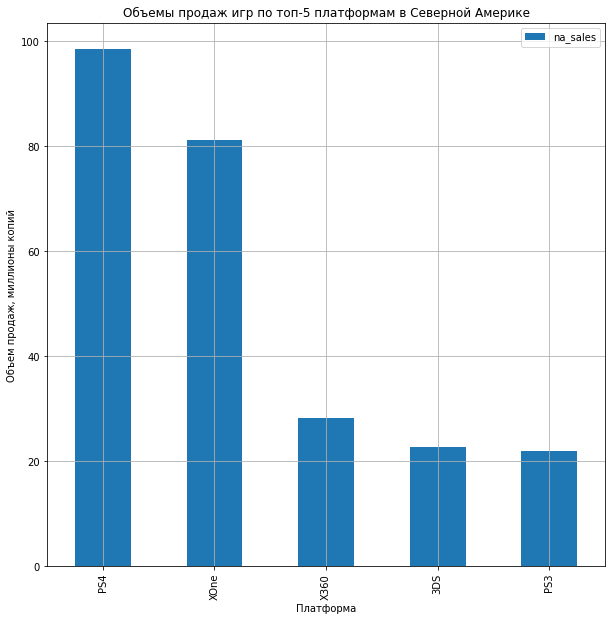

In [48]:
most_popular_na_platforms.plot(
    kind='bar', x='platform', y='na_sales', grid=True, figsize=(10, 10))
plt.xlabel('Платформа')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Объемы продаж игр по топ-5 платформам в Северной Америке')
plt.show()

В Северной Америке за анализируемый период по популярности лидируют следующие платформы:
* PS4 (34,7% от совокупного объема продаж игр в Северной Америке);
* XOne (28,6%);
* X360 (9,9%);
* 3DS (8,0%);
* PS3 (7,7%).

На топ-5 платформ приходится почти 89% от совокупного объема продаж игр в Северной Америке за анализируемый период.
Определим самые популярные платформы в Европе:

In [49]:
most_popular_eu_platforms = actual_period_games.pivot_table(
    index='platform',
    values='eu_sales',
    aggfunc='sum'
).sort_values(
    by='eu_sales', 
    ascending=False
).reset_index().head()

most_popular_eu_platforms['share'] = most_popular_eu_platforms['eu_sales'] / actual_period_games['eu_sales'].sum() * 100
most_popular_eu_platforms

,platform,eu_sales,share
0,PS4,130.04,48.041968
1,XOne,46.25,17.086597
2,PS3,25.54,9.435496
3,PC,17.97,6.638836
4,3DS,16.12,5.955372


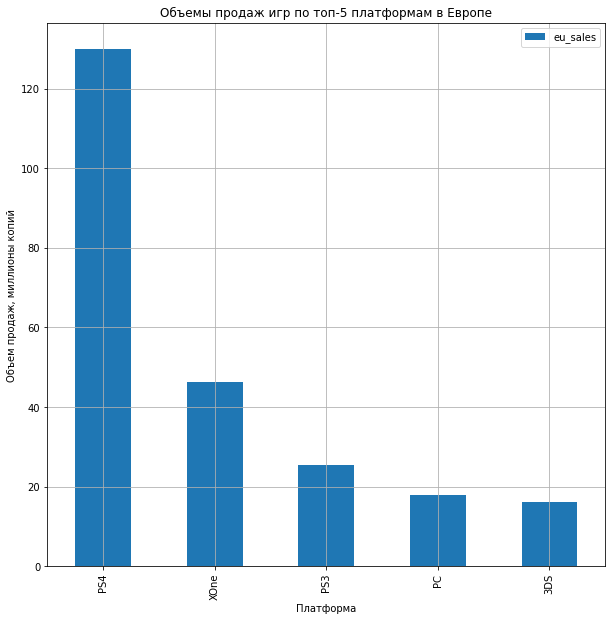

In [50]:
most_popular_eu_platforms.plot(
    kind='bar', x='platform', y='eu_sales', grid=True, figsize=(10, 10))
plt.xlabel('Платформа')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Объемы продаж игр по топ-5 платформам в Европе')
plt.show()

В Европе за анализируемый период по популярности лидируют следующие платформы:
* PS4 (48,0% от совокупного объема продаж игр в Европе);
* XOne (17,1%);
* PS3 (9,4%);
* PC (6,6%);
* 3DS (5,6%).

На топ-5 платформ приходится почти 87% от совокупного объема продаж игр в Европе за анализируемый период.
Определим самые популярные платформы в Японии:

In [51]:
most_popular_jp_platforms = actual_period_games.pivot_table(
    index='platform',
    values='jp_sales',
    aggfunc='sum'
).sort_values(
    by='jp_sales', 
    ascending=False
).reset_index().head()

most_popular_jp_platforms['share'] = most_popular_jp_platforms['jp_sales'] / actual_period_games['jp_sales'].sum() * 100
most_popular_jp_platforms

,platform,jp_sales,share
0,3DS,44.24,47.523902
1,PS4,15.02,16.134923
2,PSV,14.54,15.619293
3,PS3,11.22,12.052852
4,WiiU,7.31,7.852616


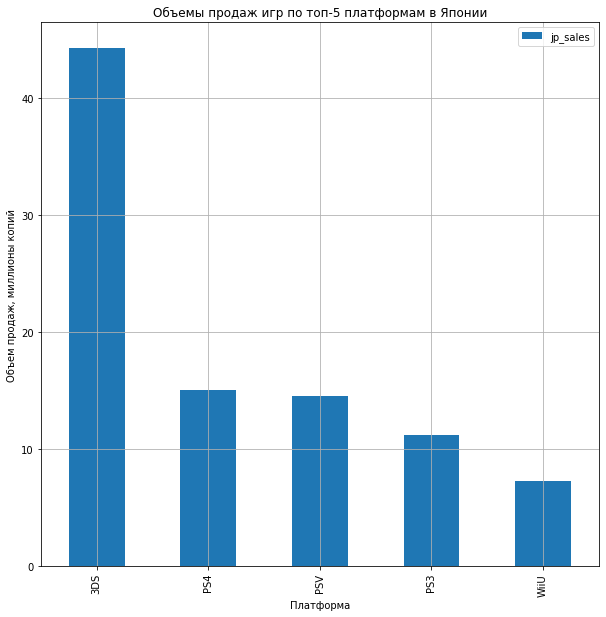

In [52]:
most_popular_jp_platforms.plot(
    kind='bar', x='platform', y='jp_sales', grid=True, figsize=(10, 10))
plt.xlabel('Платформа')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Объемы продаж игр по топ-5 платформам в Японии')
plt.show()

В Японии за анализируемый период по популярности лидируют следующие платформы:
* 3DS (47,5% от совокупного объема продаж игр в Японии);
* PS4 (16,1%);
* PSV (15,6%);
* PS3 (12,1%);
* WiiU (7,9%).

На топ-5 платформ приходится более 99% от совокупного объема продаж игр в Японии за анализируемый период.

В результате анализа платформ можно сделать следующие выводы по пользовательским предпочтениям:
* в Северной Америке пользователи предпочитают как американские (семейство X), так и японские (семейство PS) стационарные платформы, доля портативных переносных платформ относительно невелика;
* предпочтения европейских пользователей напоминают предпочтения американских, однако японские станционарные платформы пользуются большей популярностью; кроме того, в топ-5 попали игры для персональных компьютеров;
* японские пользователи предпочитают японские игровые консоли, при этом доля портативных платформ (3DS, PSV) составляет 63%.

<a id='section23'></a>
### Определение популярных жанров в зависимости от региона

Аналогичным образом популярные жанры по объемам продаж игр в Северной Америке, Японии и Европе. Начнем с Северной Америки:

In [53]:
most_popular_na_genres = actual_period_games.pivot_table(
    index='genre',
    values='na_sales',
    aggfunc='sum'
).sort_values(
    by='na_sales', 
    ascending=False
).reset_index().head()

most_popular_na_genres['share'] = most_popular_na_genres['na_sales'] / actual_period_games['na_sales'].sum() * 100
most_popular_na_genres

,genre,na_sales,share
0,Shooter,79.02,27.818067
1,Action,72.53,25.533338
2,Sports,46.13,16.239527
3,Role-Playing,33.47,11.782722
4,Misc,15.05,5.298176


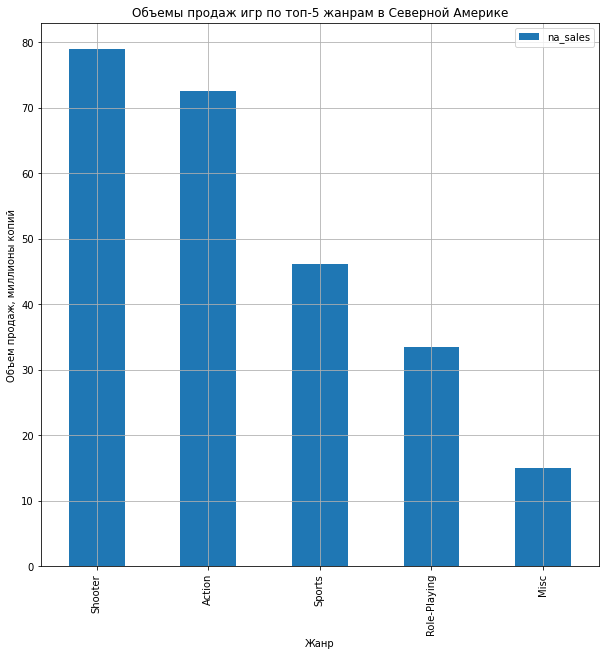

In [54]:
most_popular_na_genres.plot(
    kind='bar', x='genre', y='na_sales', grid=True, figsize=(10, 10))
plt.xlabel('Жанр')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Объемы продаж игр по топ-5 жанрам в Северной Америке')
plt.show()

В Северной Америке за анализируемый период по популярности лидируют следующие жанры:
* Shooter (27,8% от совокупного объема продаж игр в Северной Америке);
* Action (25,5%);
* Sports (16,2%);
* Role-Playing (11,8%);
* Misc (5,3%).

На топ-5 жанров приходится почти 87% от совокупного объема продаж игр в Северной Америке за анализируемый период.
Определим самые популярные жанры в Европе:

In [55]:
most_popular_eu_genres = actual_period_games.pivot_table(
    index='genre',
    values='eu_sales',
    aggfunc='sum'
).sort_values(
    by='eu_sales', 
    ascending=False
).reset_index().head()

most_popular_eu_genres['share'] = most_popular_eu_genres['eu_sales'] / actual_period_games['eu_sales'].sum() * 100
most_popular_eu_genres

,genre,eu_sales,share
0,Action,74.68,27.589774
1,Shooter,65.52,24.205704
2,Sports,45.73,16.894488
3,Role-Playing,28.17,10.407123
4,Racing,14.13,5.220186


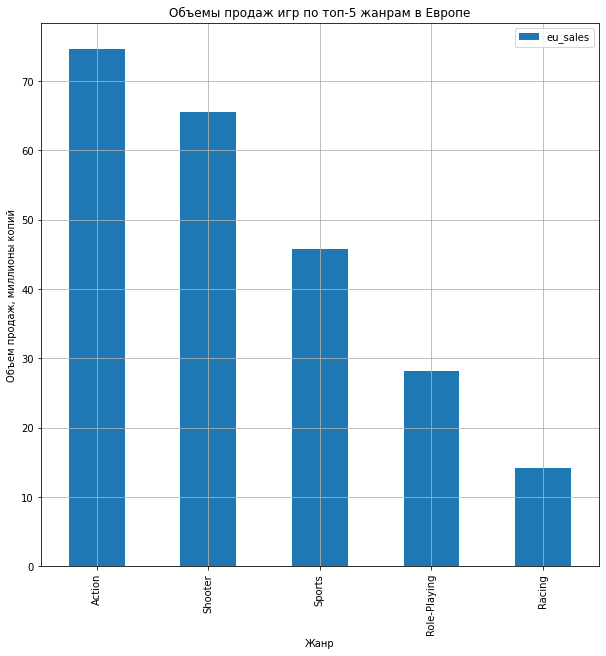

In [56]:
most_popular_eu_genres.plot(
    kind='bar', x='genre', y='eu_sales', grid=True, figsize=(10, 10))
plt.xlabel('Жанр')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Объемы продаж игр по топ-5 жанрам в Европе')
plt.show()

В Европе за анализируемый период по популярности лидируют следующие жанры:
* Action (27,6% от совокупного объема продаж игр в Европе);
* Shooter (24,2%);
* Sports (16,9%);
* Role-Playing (10,4%);
* Racing (5,2%).

На топ-5 жанров приходится чуть больше 84% от совокупного объема продаж игр в Европе за анализируемый период.
Определим самые популярные жанры в Японии:

In [57]:
most_popular_jp_genres = actual_period_games.pivot_table(
    index='genre',
    values='jp_sales',
    aggfunc='sum'
).sort_values(
    by='jp_sales', 
    ascending=False
).reset_index().head()

most_popular_jp_genres['share'] = most_popular_jp_genres['jp_sales'] / actual_period_games['jp_sales'].sum() * 100
most_popular_jp_genres

,genre,jp_sales,share
0,Role-Playing,31.16,33.472983
1,Action,29.58,31.775701
2,Fighting,6.37,6.842840
3,Misc,5.61,6.026426
4,Shooter,4.87,5.231496


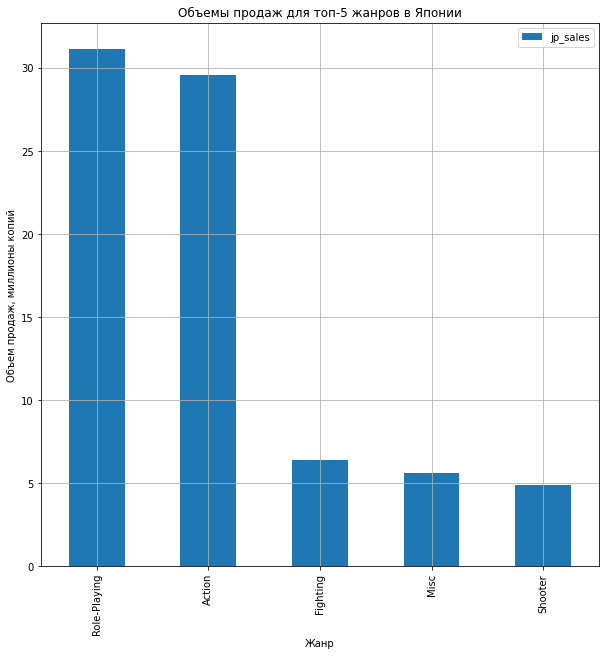

In [58]:
most_popular_jp_genres.plot(
    kind='bar', x='genre', y='jp_sales', grid=True, figsize=(10, 10))
plt.xlabel('Жанр')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Объемы продаж для топ-5 жанров в Японии')
plt.show()

В Японии за анализируемый период по популярности лидируют следующие жанры:
* Role-Playing (33,5% от совокупного объема продаж игр в Японии);
* Action (31,7%);
* Fighting (6,8%);
* Misc (6,0%);
* Shooter (5,2%).

На топ-5 платформ приходится около 83% от совокупного объема продаж игр в Японии за анализируемый период.

В результате анализа жанров можно сделать следующие выводы по пользовательским предпочтениям:
* в Северной Америке и Еропе структура топ-5 жанров различается незначительно - пользователи предпочитают игры жанров Action, Shooter, Sports и Role Playing, однако в Америке на 5 месте по популярности жанр Misc, а в Европе - Racing;
* структура предпочтений японских пользователей от европейских и американских отличается значительно -  с отрывом лидируют Role-Playing и Action, кроме них популярны Misc, Fighting и Shooter.

<a id='section24'></a>
### Оценка влияния рейтинга ESRB на объемы продаж по регионам

Оценим влияние рейтинга ESRB на объемы продаж в Северной Америке, Европе и Японии - построим диаграммы распределения и посчитаем средние значения объема продаж в зависимости от значения рейтинга. Начнем с Северной Америки:

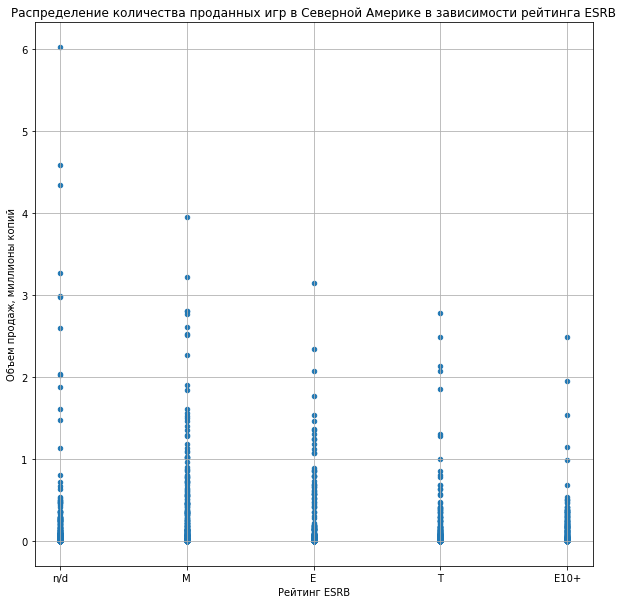

In [59]:
actual_period_games.plot(
    x='rating',
    y='na_sales',
    kind='scatter',
    grid='true',
    figsize=(10, 10)
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Распределение количества проданных игр в Северной Америке в зависимости рейтинга ESRB')
plt.show()

In [60]:
actual_period_games.groupby(
    'rating'
).agg(
    {
        'na_sales' : 'mean'
    }
).sort_values(
    by='na_sales',
    ascending=False
)

,na_sales
rating,
M,0.363849
E,0.231689
E10+,0.179622
T,0.143727
n/d,0.086409


По объемам продаж лидируют игры с рейтингом M (для взрослых старше 17 лет) и E (для всех). Очевидной зависимости между ограничением по рейтингу и объемом продаж в парадигме "меньше ограничений - больше объем продаж" или наоборот нет. Можно сделать вывод, что в Северной Америке популярностью пользуются игры с достаточно откровенным контентом и игры без ограничений.

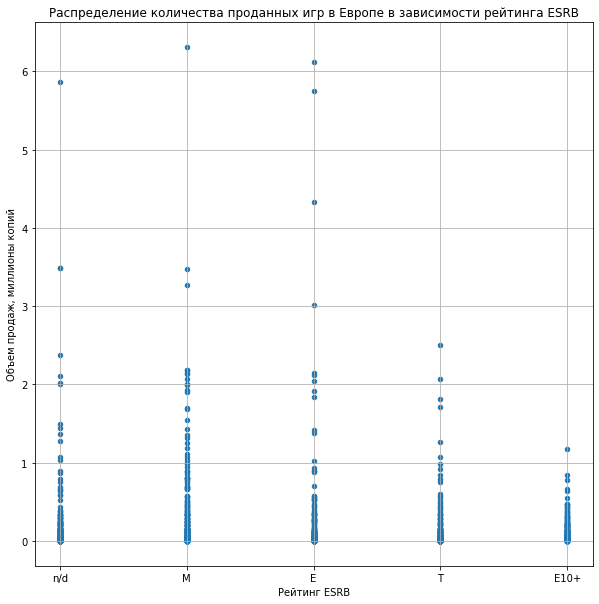

In [61]:
actual_period_games.plot(
    x='rating',
    y='eu_sales',
    kind='scatter',
    grid='true',
    figsize=(10, 10)
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Распределение количества проданных игр в Европе в зависимости рейтинга ESRB')
plt.show()

In [62]:
actual_period_games.groupby(
    'rating'
).agg(
    {
        'eu_sales' : 'mean'
    }
).sort_values(
    by='eu_sales',
    ascending=False
)

,eu_sales
rating,
M,0.352604
E,0.265114
E10+,0.141405
T,0.125720
n/d,0.078705


В Европе, как и в Северной Америке, популярны игры с рейтингами M и E. Кроме того, в Европе также популярны игры для детей от 10 лет и подростков. Явная зависимость объема продаж от рейтинга также неочевидна.

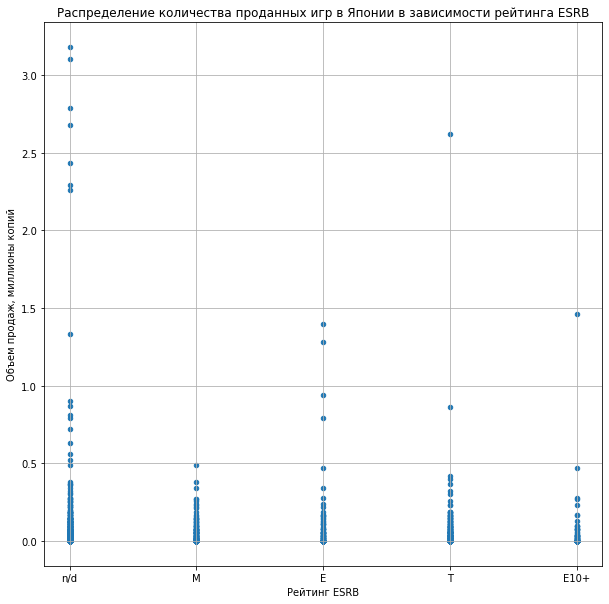

In [63]:
actual_period_games.plot(
    x='rating',
    y='jp_sales',
    kind='scatter',
    grid='true',
    figsize=(10, 10)
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Объем продаж, миллионы копий')
plt.title('Распределение количества проданных игр в Японии в зависимости рейтинга ESRB')
plt.show()

In [64]:
actual_period_games.groupby(
    'rating'
).agg(
    {
        'jp_sales' : 'mean'
    }
).sort_values(
    by='jp_sales',
    ascending=False
)

,jp_sales
rating,
n/d,0.075968
T,0.054539
E,0.040822
M,0.030226
E10+,0.024108


В Японии популярны игры без рейтинга ESRB, что можно объяснить наличием собственных производителей консолей и игр, которые популярны на внутреннем рынке, например - Nintendo. Также популярны игры 
игры для подростков и игры без ограничения по контенту. Очевдное влияние рейтинга на объем продаж также не выявлено.

<a id='section25'></a>
### Вывод

В результате анализа можем составить следующие пользовательские портреты в зависимости от региона:

* пользователь в Америке предпочитает стационарные игровые консоли семейсва Xbox или PS, или портативную Nintendo 3DS, и игры жанров Action, Shooter, Sports и Role-Playing;
* пользователь в Европе предпочитает стационарные консоли PlayStation или Xbox 360, а также портативную 3DS и персональный компьютер, и игры жанров Action, Shooter, Sports, Role-Playing и Racing;
* пользователь в Японии предпочитает станционарные и портативные консоли семейства PS и портативную Nintendo 3DS, и игры жанров Role-Playing, Action, Fighting и Shooter.

<a id='section26'></a>
## Проверка гипотез

<a id='section27'></a>
### Различие средних пользовательских рейтингов платформ Xbox One и PC

Проверим гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. При этом нулевой гипозой будет гипотеза о равенстве средних пользовательских рейтигов платформ, а альтернативная - о неравенстве средних пользовательских рейтингов. Сохраним выборки в переменные `xone_rating` и `pc_rating`:

In [65]:
xone_rating = actual_period_games.loc[
    (
        actual_period_games['platform'] == 'XOne'
    ) & 
    (
        actual_period_games['user_score'] != 0
    ), 'user_score'
]

pc_rating = actual_period_games.loc[
    (
        actual_period_games['platform'] == 'PC'
    ) & 
    (
        actual_period_games['user_score'] != 0
    ), 'user_score'
]

Выведем описание выборок:

In [66]:
xone_rating.describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [67]:
pc_rating.describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Выборки разного размера. Для проверки гипотезы будем использовать двусторонний t-тест Стьюдента, примем уровень статистической значимости, равный 0,05:

In [68]:
alpha = .05
first_test = st.ttest_ind(
    xone_rating,
    pc_rating,
    equal_var = False # используем этот параметр потому, что выборки разного размера
)

print('p-значение:', first_test.pvalue)

if first_test.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Значение p-value слишком большое, чтобы делать выводы о значимом различии между средними пользовательскими рейтингами.

<a id='section28'></a>
### Различие средних пользовательских рейтингов игр жанров Action и Sports

Проверим гипотезу о неравенстве средних пользовательских рейтингов игр жанров Action и PC. При этом нулевой гипозой будет гипотеза о равенстве средних пользовательских рейтингов игр этих жанров, а альтернативная - о неравенстве средних пользовательских рейтингов. Сохраним выборки в переменные `action_rating` и `sports_rating`:

In [69]:
action_rating = actual_period_games.loc[
    (
        actual_period_games['genre'] == 'Action'
    ) & 
    (
        actual_period_games['user_score'] != 0
    ), 'user_score'
]

sports_rating = actual_period_games.loc[
    (
        actual_period_games['genre'] == 'Sports'
    ) & 
    (
        actual_period_games['user_score'] != 0
    ), 'user_score'
]

Выведем описание выборок:

In [70]:
action_rating.describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [71]:
sports_rating.describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

Выборки разного размера. Для проверки гипотезы будем использовать двусторонний t-тест Стьюдента, примем уровень статистической значимости, равный 0,05:

In [72]:
alpha = .05
second_test = st.ttest_ind(
    action_rating,
    sports_rating,
    equal_var = False # используем этот параметр потому, что выборки разного размера
)

print('p-значение:', second_test.pvalue)

if second_test.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Очевидно, что p-значение меньше порогового. Следовательно, можем принять гипотезу о неравенстве значений средних пользовательских рейтингов.

<a id='section29'></a>
### Вывод

В результате проверки гипотез можем сделать следующие выводы:
* значимого различия между средними пользовательскими рейтингами игр для платформ Xbox One и PC нет;
* значимое различие между средними пользовательскими рейтингами игр жанров Aciton и Sports есть.

<a id='section30'></a>
## Вывод по исследованию

В результате проведенного исследования можно сделать следующие выводы:
* для рекаламной кампании следует выбрать игры жанра Shooter для консолей PS4 и XOne, так как они пользуются у пользователей наибольшей популярностью;
* при выборе игр для планирования рекламной кампании следует обращать внимание на оценки критиков, а на оценки пользователей можно внимания не обращать;
* при рекламе игр на локальных североамериканском и европейском рынках следует выбрать игры для платформ PS4 и XOne и жанров Shooter и Action c рейтингами ESRB M и E, так как они наиболее востребованы у локальных пользователей;
* при рекламе игр на локальном японском рынке следует выбрать игры для платформ PS4 и 3DS и жанров Shooter и Action c с рейтигами ESRB T и E, и без рейтинга.